# van der Pol oscillator

d2x/dt2 + mu (x^2-1) dx/dt + x = 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#define flow for x, v=dx/dt

def flow(y, t, mu):
    dx = y[1]
    dv = -mu*(y[0]*y[0]-1)*y[1] - y[0]    
    return [dx, dv]

#### generate data and plot trajectory in phase space

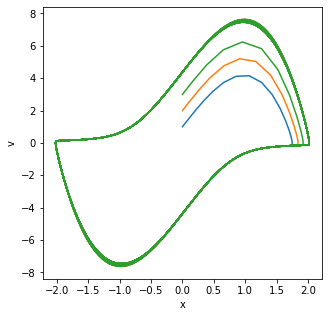

In [15]:
mu=5
# try mu=0,0.03,.1, 1,2,5

t = np.linspace(0,200,4000)
x = np.linspace(-1, 1, 4)
X,Y = np.meshgrid(x,x)

plt.figure(figsize=(5,5))    
for i in range(3):  
    y0 = 0,1+i
    y = odeint(flow, y0, t, (mu,))
    plt.plot(y[:,0], y[:,1])

plt.xlabel("x")
plt.ylabel("v");

#### plot trajectory x(t)

for strong nonlinear friction:

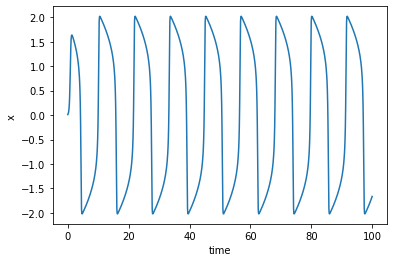

In [16]:
mu=5

y0 = [.01, .1]
t = np.linspace(0,100,1000)
y = odeint(flow, y0, t, (mu,))
plt.plot(t,y[:,0])
plt.xlabel("time")
plt.ylabel("x ");

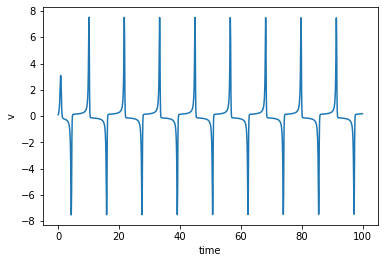

In [17]:
plt.plot(t,y[:,1])
plt.xlabel("time")
plt.ylabel("v");

for weak nonlinear friction

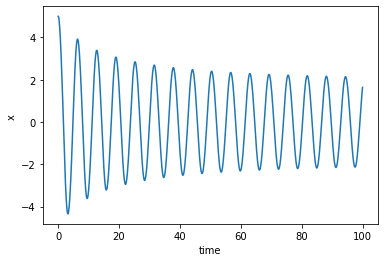

In [18]:
mu = 0.02
# try initial conditions with small and large x, e.g. y0 = [.01, .1] and y0 = [5, .1]
# try different (but all small) values of mu 

y0 = [5, .1]
t = np.linspace(0,100,1000)
y = odeint(flow, y0, t, (mu,))
plt.plot(t,y[:,0])
plt.xlabel("time")
plt.ylabel("x ");

## Strong friction limit ($\mu\gg1$)

In [19]:
#define flow for x, y= (dx/dt)/mu + F(x) with F(x) = (x**3)/3 - x

def F(x):
    return (x**3)/3 -x

def flow2(y, t, mu):
    dx = mu*( y[1] - F(y[0]) )
    dy = -y[0]/mu   
    return [dx, dy]

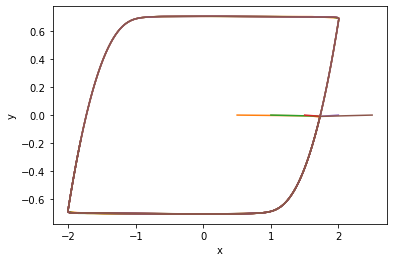

In [20]:
# trajectory in (x,y)-phase space 

mu=20
# try mu=3, 5,10, 20

t = np.linspace(0,50,500)

for i in range(6):
    y0 = i/2,0
    y = odeint(flow2, y0, t, (mu,))
    plt.plot(y[:,0], y[:,1])
plt.xlabel("x")
plt.ylabel("y");

#### now plot the trajectory together with the cubic nullcline

dx/dt = 0 leads to y = F(x)

(the other nullcline is the y axis)

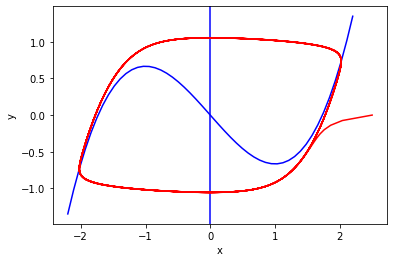

In [21]:

mu = 3
# try different mu values

t = np.linspace(0,50,500)

# generate the cubic nullcline  
x1 = np.linspace(-2.2,2.2,50)
nc1 = F(x1)

# generate trajectory
y0 = i/2,0
y = odeint(flow2, y0, t, (mu,))

# plot both
plt.plot(x1,nc1, color='b', linestyle='-') #dot x=0 nullcline
plt.axvline(x=0, color='b', linestyle='-') # dot y=0 nullcline
plt.plot(y[:,0], y[:,1], color='r')
plt.xlabel("x")
plt.ylabel("y");